# Analytics: Which boroughs' stations needed help most often?

In [1]:
import psycopg2

from sqlalchemy import create_engine
from sqlalchemy import text

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
database_host='localhost'

In [3]:
def get_connection(host = "localhost",schema="" ):
    
    conn = psycopg2.connect("dbname='proj001_lfb' user='postgres' "
                            "host=" + host )
    if schema:
        cur = conn.cursor()
        query = "SET search_path TO {}".format(schema)
        cur.execute(query)

    return conn

# Create a dataframe for analytics

In [4]:
conn = get_connection(host=database_host)
qry = ('select *'
          'from proj001_lfb_0_1_0.l3_incidents '
          ';')
#data = pd.read_sql(qry, conn).drop(['store_no','store_type'], axis=1)  
df_incidents = pd.read_sql(qry, conn)  
df_incidents.head()

,id,incidentnumber_cln,dateofcall_cln,id_incident_type,id_property,id_postcode,incident_station_ground,num_stations_with_pumps_attending,num_pumps_attending
0,1,59344101,2010-04-19 23:08:11,23,27,76424,BROMLEY,1,1
1,2,56379101,2010-04-15 10:53:27,1,27,76424,BROMLEY,2,2
2,3,82525101,2010-05-27 11:07:09,1,23,76424,BROMLEY,2,2
3,4,78105101,2010-05-21 03:58:48,1,31,76424,BROMLEY,1,2
4,5,87501101,2010-06-04 17:06:48,1,31,76424,BROMLEY,1,2


Convert to correct types

In [5]:
df_incidents.dtypes

id                                            int64
incidentnumber_cln                           object
dateofcall_cln                       datetime64[ns]
id_incident_type                              int64
id_property                                   int64
id_postcode                                   int64
incident_station_ground                      object
num_stations_with_pumps_attending            object
num_pumps_attending                          object
dtype: object

In [6]:
pd.to_datetime(df_incidents['dateofcall_cln'])

# Convert to integer
df_incidents['num_stations_with_pumps_attending']=df_incidents['num_stations_with_pumps_attending'].replace(np.nan,'0',regex=True)
df_incidents['num_stations_with_pumps_attending']=df_incidents['num_stations_with_pumps_attending'].astype('int')

# Convert to integer
df_incidents['num_pumps_attending']=df_incidents['num_pumps_attending'].replace(np.nan,'0',regex=True)
df_incidents['num_pumps_attending']=df_incidents['num_pumps_attending'].astype('int')

df_incidents.set_index('id')

print(df_incidents.dtypes)
df_incidents.head()


id                                            int64
incidentnumber_cln                           object
dateofcall_cln                       datetime64[ns]
id_incident_type                              int64
id_property                                   int64
id_postcode                                   int64
incident_station_ground                      object
num_stations_with_pumps_attending             int64
num_pumps_attending                           int64
dtype: object


,id,incidentnumber_cln,dateofcall_cln,id_incident_type,id_property,id_postcode,incident_station_ground,num_stations_with_pumps_attending,num_pumps_attending
0,1,59344101,2010-04-19 23:08:11,23,27,76424,BROMLEY,1,1
1,2,56379101,2010-04-15 10:53:27,1,27,76424,BROMLEY,2,2
2,3,82525101,2010-05-27 11:07:09,1,23,76424,BROMLEY,2,2
3,4,78105101,2010-05-21 03:58:48,1,31,76424,BROMLEY,1,2
4,5,87501101,2010-06-04 17:06:48,1,31,76424,BROMLEY,1,2


## Extract and cast the postcodes data

In [7]:
qry = ("select *"
           "from proj001_lfb_0_1_0.l3_postcodes "
            " ;")
#data = pd.read_sql(qry, conn).drop(['store_no','store_type'], axis=1)  
df_postcodes = pd.read_sql(qry, conn)  
df_postcodes.set_index('id')
df_postcodes.head(20)


,id,postcode_full,postcode_district,incgeo_boroughname,incgeo_wardname,incgeo_wardnamenew,frs
0,1,AL1 3EA,AL1,NOT GEO-CODED,NOT GEO-CODED,NOT GEO-CODED,OVERTHEBORDER
1,2,AL2 1QY,AL2,NOT GEO-CODED,NOT GEO-CODED,NOT GEO-CODED,OVERTHEBORDER
2,3,BR1 1AE,BR1,BROMLEY,BROMLEY TOWN,BROMLEY TOWN,LONDON
3,4,BR1 1BQ,BR1,BROMLEY,BROMLEY TOWN,BROMLEY TOWN,LONDON
4,5,BR1 1BW,BR1,BROMLEY,BROMLEY TOWN,BROMLEY TOWN,LONDON
5,6,BR1 1BY,BR1,BROMLEY,BROMLEY TOWN,BROMLEY TOWN,LONDON
6,7,BR1 1DD,BR1,BROMLEY,BROMLEY TOWN,BROMLEY TOWN,LONDON
7,8,BR1 1DE,BR1,BROMLEY,BROMLEY TOWN,BROMLEY TOWN,LONDON
8,9,BR1 1DJ,BR1,BROMLEY,BROMLEY TOWN,BROMLEY TOWN,LONDON
9,10,BR1 1DN,BR1,BROMLEY,BROMLEY TOWN,BROMLEY TOWN,LONDON


In [8]:
df_postcodes.dtypes

id                     int64
postcode_full         object
postcode_district     object
incgeo_boroughname    object
incgeo_wardname       object
incgeo_wardnamenew    object
frs                   object
dtype: object

## Join incidents to postcodes

In [9]:
df_analytics = pd.merge(df_incidents,
                        df_postcodes[['id','postcode_full', 'incgeo_boroughname', 'incgeo_wardname','frs']],
                        how='left', left_on='id_postcode', right_on='id')
df_analytics.drop(['id_postcode','id_y','id_x'], axis=1, inplace=True)
df_analytics.head(5)

,incidentnumber_cln,dateofcall_cln,id_incident_type,id_property,incident_station_ground,num_stations_with_pumps_attending,num_pumps_attending,postcode_full,incgeo_boroughname,incgeo_wardname,frs
0,59344101,2010-04-19 23:08:11,23,27,BROMLEY,1,1,None,BROMLEY,BICKLEY,LONDON
1,56379101,2010-04-15 10:53:27,1,27,BROMLEY,2,2,None,BROMLEY,BICKLEY,LONDON
2,82525101,2010-05-27 11:07:09,1,23,BROMLEY,2,2,None,BROMLEY,BICKLEY,LONDON
3,78105101,2010-05-21 03:58:48,1,31,BROMLEY,1,2,None,BROMLEY,BICKLEY,LONDON
4,87501101,2010-06-04 17:06:48,1,31,BROMLEY,1,2,None,BROMLEY,BICKLEY,LONDON


# Which boroughs required most help from other stations?

In [10]:
df_boroughs_needing_help = df_analytics.loc[df_analytics['num_stations_with_pumps_attending'] > 1][['incgeo_boroughname','num_stations_with_pumps_attending']]
print(df_boroughs_needing_help.shape)

df_by_borough=df_boroughs_needing_help.groupby(['incgeo_boroughname'], as_index=False).count().sort_values(by='num_stations_with_pumps_attending', ascending=False)
df_by_borough.columns = ['incgeo_boroughname','incidents_needing_help']


df_by_borough.head()


(142290, 2)


,incgeo_boroughname,incidents_needing_help
6,CAMDEN,8844
33,WESTMINSTER,8579
28,SOUTHWARK,6864
23,LEWISHAM,6274
30,TOWER HAMLETS,6184


Visualize the results

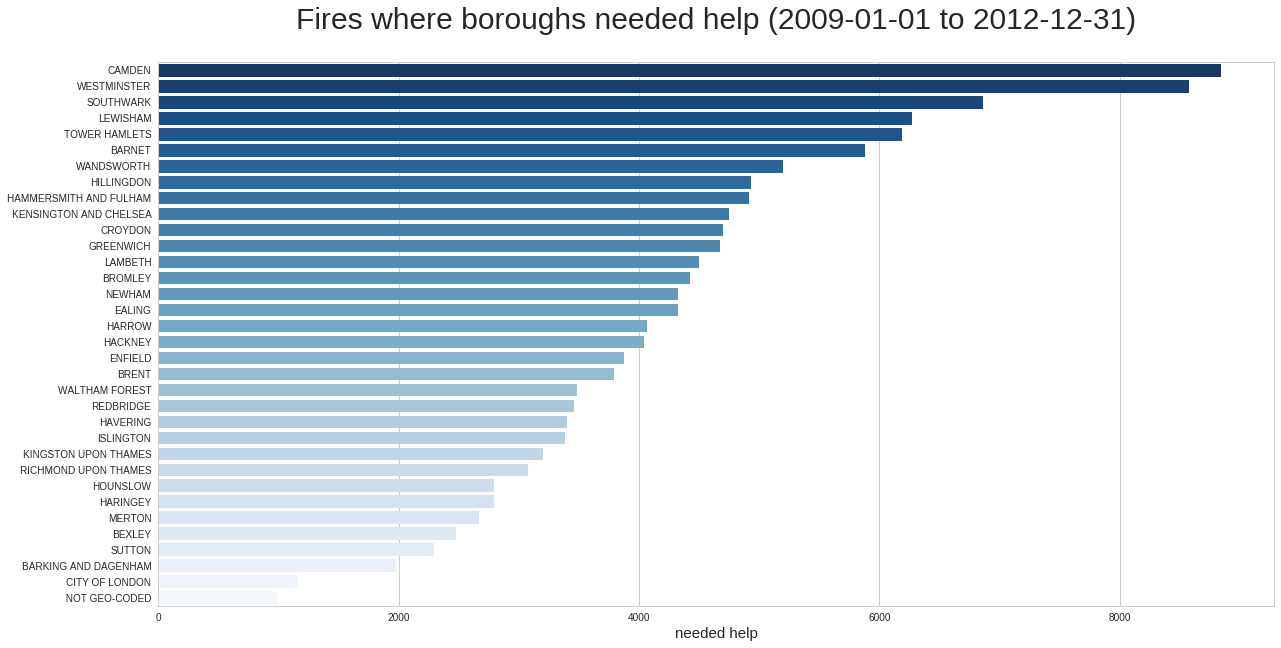

In [11]:
# calculate date range for the title
from_date = min(df_analytics['dateofcall_cln']).to_pydatetime().date()
to_date = max(df_analytics['dateofcall_cln']).to_pydatetime().date()
title = "Fires where boroughs needed help (" + str(from_date) + ' to ' + str(to_date) + ")"

sns.set(style="whitegrid")
sns.set_color_codes("muted")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# plot counts of help needed with a reversed Blues palette
ax = sns.barplot(y="incgeo_boroughname", x="incidents_needing_help", data=df_by_borough, palette='Blues_r')
ax.set_title(title,fontsize=30)
ax.set_xlabel('needed help',fontsize=15)
ax.set_ylabel('',fontsize=30)
ax.title.set_position([.5, 1.05])


# Store results in database for reference later
Create workproduct space in the database

In [36]:

engine = create_engine('postgresql://postgres@'+database_host+':5432/proj001_lfb')
conn = engine.connect()

sql = text('drop schema if exists wp_004_event_analytics_01 cascade;')
conn.execute(sql)

sql = text('create schema if not exists wp_004_event_analytics_01;' )
conn.execute(sql)



In [37]:
df_by_borough.to_sql(name='df_by_borough',con= engine,schema ='wp_004_event_analytics_01')

# Quick inspection that this worked 

In [38]:
df_results=pd.read_sql('select * from wp_004_event_analytics_01.df_by_borough limit 5;',con=engine)
print(df_results)
conn.close()

   index incgeo_boroughname  incidents_needing_help
0      6             CAMDEN                    8844
1     33        WESTMINSTER                    8579
2     28          SOUTHWARK                    6864
3     23           LEWISHAM                    6274
4     30      TOWER HAMLETS                    6184
